In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [32]:
df = pd.read_csv('datasets/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [34]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [35]:
df.isna().sum()     

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [36]:
df_new = df.drop(['Car_Name', 'Owner'], axis=1)
df_new.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual


In [37]:
for feature in df_new.columns:
    le = LabelEncoder() 
    le.fit(df_new[feature].unique())
    df_new[feature] = le.transform(df_new[feature])
    
X = df_new.drop(['Selling_Price'], axis=1)
y = df_new['Selling_Price']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [46]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_test_pred_lr = lr_model.predict(x_test)
R2_lr = metrics.r2_score(y_test, y_test_pred_lr)
print('MAE score for Linear Regression Model:', R2_lr)

MAE score for Linear Regression Model: 0.9166612395312798


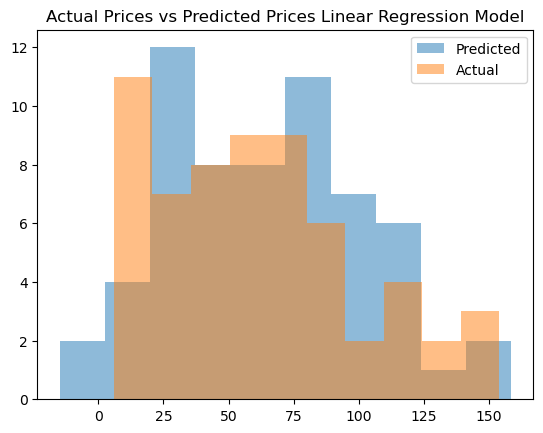

In [47]:
plt.hist(y_test_pred_lr, alpha=0.5, label='Predicted')
plt.hist(y_test, alpha=0.5, label='Actual')
plt.legend(loc='upper right')
plt.title('Actual Prices vs Predicted Prices Linear Regression Model')
plt.show()

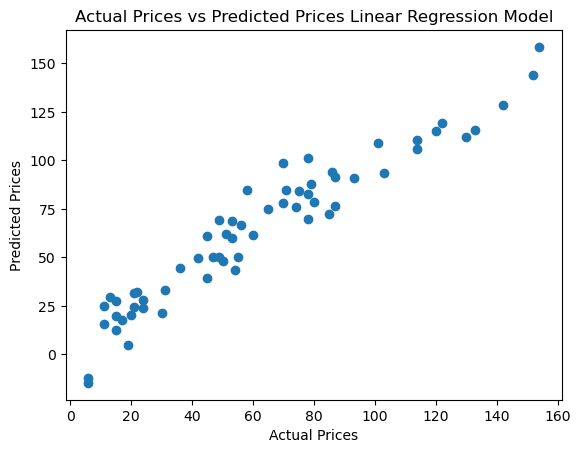

In [49]:
plt.scatter(y_test, y_test_pred_lr)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')  
plt.title('Actual Prices vs Predicted Prices Linear Regression Model')
plt.show()

In [50]:
lasso_model = Lasso(alpha=0.01) 
lasso_model.fit(x_train, y_train)
y_train_pred_lasso = lasso_model.predict(x_train)
R = metrics.r2_score(y_train, y_train_pred_lasso)
print('MAE score for Lasso Regression Model:', R)

MAE score for Lasso Regression Model: 0.9313610764947262


In [51]:
y_test_pred_lasso = lasso_model.predict(x_test)
R2_Test_lasso = metrics.r2_score(y_test, y_test_pred_lasso)
print('MAE score for Lasso Regression Model:', R2_Test_lasso)

MAE score for Lasso Regression Model: 0.9169124369811621


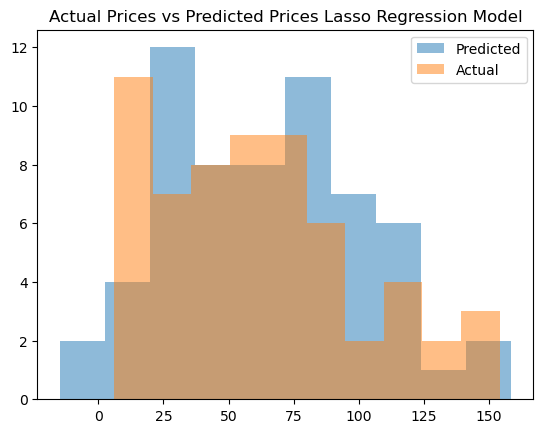

In [52]:
plt.hist(y_test_pred_lasso, alpha=0.5, label='Predicted')
plt.hist(y_test, alpha=0.5, label='Actual')
plt.legend(loc='upper right')
plt.title('Actual Prices vs Predicted Prices Lasso Regression Model')
plt.show()

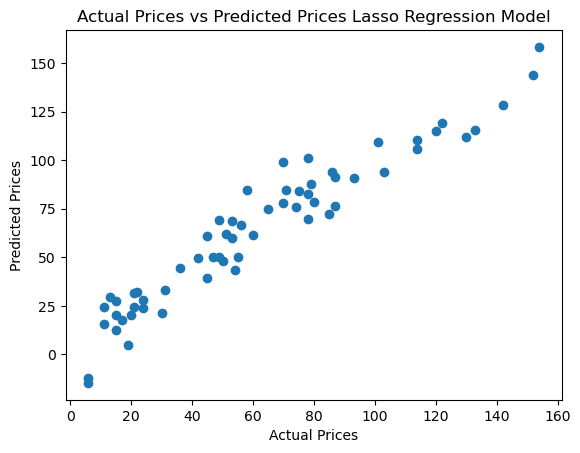

In [53]:
plt.scatter(y_test, y_test_pred_lasso)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices Lasso Regression Model')
plt.show()

In [54]:
print('Linear Regression Model r2 Test Score:', R2_lr)
print('Lasso Regression Model r2 Test Score:', R2_Test_lasso)

Linear Regression Model r2 Test Score: 0.9166612395312798
Lasso Regression Model r2 Test Score: 0.9169124369811621


In [63]:
filename = 'car_price_model.pkl'
pickle.dump(lasso_model , open(filename, 'wb'))

In [64]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9169124369811621
